# <center>R2.08 - Outils numériques pour les statistiques descriptives <br> TP1 - Introduction à Panda<center>


_Tom Ferragut, Regis Fleurquin, Lucie Naert_

_IUT de Vannes, BUT Informatique_

**Document pouvant être utile :**
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

### Imports

In [1]:
# importation des packages
import numpy as np
import pandas as pd # Nous utiliserons uniquement la classe DataFrame et non la classe Series

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

C:\Users\omerf\AppData\Local\Temp\ipykernel_3600\233755097.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # Nous utiliserons uniquement la classe DataFrame et non la classe Series


## 1 - Dataframes

### 1.b - Tableau de données

L'objectif de cette partie est de se familiariser avec les fonctions de bases du package **Panda**. Cela se fera partiellement en autonomie, vous devrez utiliser la documentation de **Panda** (ou le lien donné en introduction) pour trouver comment utiliser certaines fonctions.

>__Question 1 :__ Grâce à la fonction `pd.read_csv`, charger les données du fichier **vgsalesGlobale.csv** dans un DataFrame que l'on appellera "games". Puis exécuter la fonction : `games.head()`, que fait cette fonction ? 

In [2]:
games = pd.read_csv('vgsalesGlobale.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



>__Question 2 :__ Dans une cellule 'Markdown', lister les différentes __variables__ du tableau "games" en précisant son type : *qualitative*, *nominale*, *ordinale*, *quantitative*, *discrète*, *continue*.

Rank : Qualitatives Ordinale
Platform : Qualitatives Nominale
Year : Qualitatives Ordinale
Genre : Qualitatives Nominale
Publisher : Qualitatives Nominale
NA_Sales : Quantitative Discrète
EU_Sales : Quantitative Discrète
JP_Sales : Quantitative Discrète
Other_Sakes : Quantitative Discrète
Global_Sales : Quantitative Discrète

Dans la question suivante nous nous concentrons sur la variable "Genre" des données "games". 

>__Question 3 :__ En vous aidant de la documentation de panda, et plus particulièrement des méthodes `value_count` et `unique`, réaliser la liste des actions suivantes :
> - Afficher la liste des variables
> - Afficher l'effectif de chaque modalité de la variable "Platform" dans l'ordre croissant.
> - Afficher la fréquence de chaque modalité de la variable "Publisher".
> - Afficher la liste et le nombre de modalités de la variable "Genre" 

In [43]:
print(games.columns, end='\n\n') #Affiche la liste des variables
print(games.Platform.value_counts(), end='\n\n') #Affiche le nb de fois où les plateforms apparaissent
print(games['Publisher'].value_counts()) #Afficher la fréquence de chaque modalité de la variable Publisher

print(games.Genre.unique(), end='\n\n') #Liste
print(games.Genre.nunique(), end='\n\n') #Nombre

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment 

__Remarque :__ La fonction games.Genre.value_counts() correspond au **tableau agrégé** de la variable "Genre". 

### 1.b - Représentation graphique

À partir de ces tableaux nous pouvons dés à présent tracer des diagrammes grâce notamment à la méthode `plot`, voici un exemple :

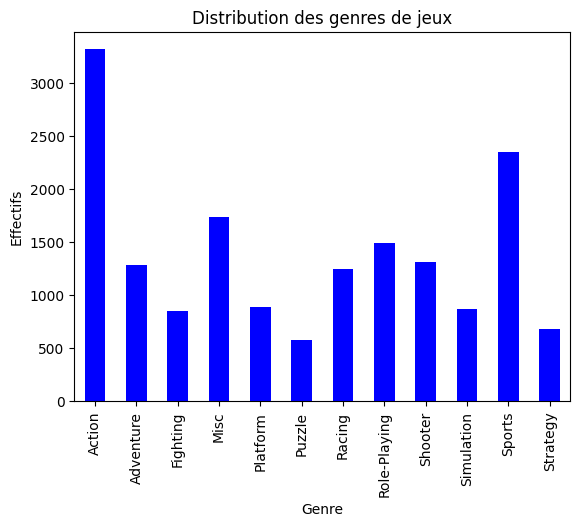

In [3]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
games.Genre.value_counts().sort_index().plot(kind="bar", color='blue')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Genre')
plt.ylabel('Effectifs')
plt.title('Distribution des genres de jeux')

# Affichez le graphique
plt.show()

>__Question 4 :__ Représenter graphiquement, avec le diagramme le plus adapté, la distribution des jeux selon la **plateforme** et selon l'**année de publication**. Expliquer votre choix dans chacun des cas.

In [4]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
plt.bar(games['Platform'], games['Global_Sales'], color='darkorange')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Années')
plt.ylabel('Ventes en Millions')
plt.title('Evolution des ventes de jeux vidéos')

# Affichez le graphique
plt.show()

KeyboardInterrupt: 

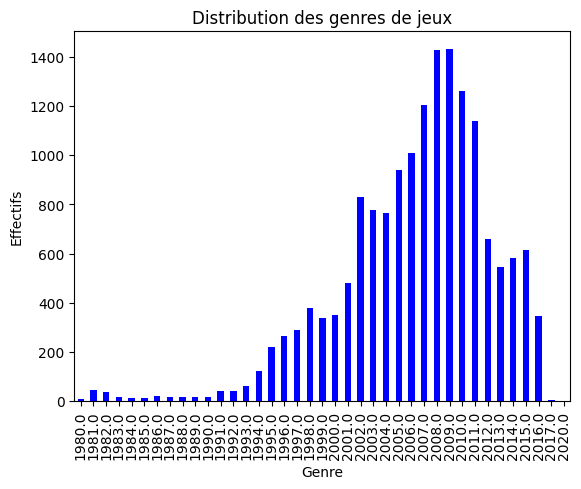

In [70]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
games.Year.value_counts().sort_index().plot(kind="bar", color='blue')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Genre')
plt.ylabel('Effectifs')
plt.title('Distribution des genres de jeux')

# Affichez le graphique
plt.show()

>__Question 5 :__ En utilisant la méthode `plt.bar` de __matplotlib__, représenter graphiquement l'évolution de la vente globale de jeux vidéos depuis 1980.

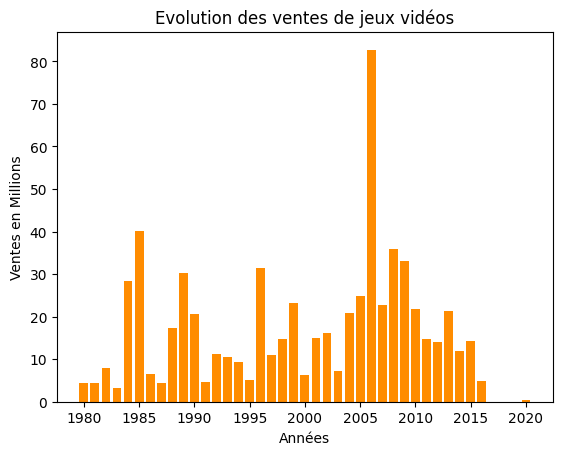

In [ ]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
plt.bar(games['Year'], games['Global_Sales'], color='darkorange')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Années')
plt.ylabel('Ventes en Millions')
plt.title('Evolution des ventes de jeux vidéos')

# Affichez le graphique
plt.show()

### Histogrammes

Les histogrammes sont des représentations graphiques qui permettent de visualiser la distribution d'une __variable continue__, ces diagrammes sont utiles pour comprendre la répartition des différentes valeurs que prend une variable. Plus précisément :

- __Composants :__ Il est composé de rectangles adjacents, où chaque rectangle représente une plage de valeurs (bin).

- __Axe horizontal :__ L'axe horizontal représente la variable étudiée, divisée en intervalles pouvant être de largeurs distincts.

- __Axe vertical :__ L'axe vertical indique la fréquence (ou densité) des observations dans chaque intervalle, avec la hauteur du rectangle correspondante.

- __Surface des rectangles :__ La __surface__ de chaque rectangle est proportionnelle à la fréquence des observations dans la plage correspondante.

- __Interprétation :__ La __surface__ totale de tous les rectangles représente l'étendue des données et peut être interprétée comme une probabilité.

- __Utilisation :__ Utile pour visualiser la forme de la distribution des données de __variables continues__.

- __Paramètres :__ Peut être personnalisé avec des paramètres tels que le nombre de bacs (bins), le tri, et la normalisation.

>__Question 6 :__ En utilisant la méthode `plt.hist()` de __matplotlib__, tracer plusieurs histogrammes représentant les ventes globales des 50 jeux vidéos ayant le plus de ventes.

(array([30., 18.,  1.]),
 array([10., 20., 40., 80.]),
 <BarContainer object of 3 artists>)

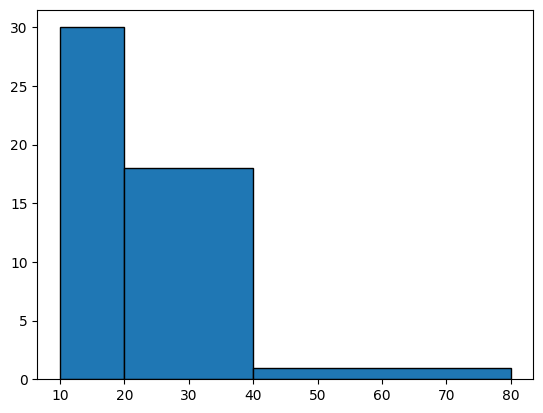

In [5]:
# Histogramme des ventes globales
plt.hist(games.head(50).Global_Sales, bins=[10,20,40,80], edgecolor='black')

## 2 - Recherches et manipulations des données

Dans cette partie on se concentre sur la recherche et l'organisation de certaines données du tableau. Cela peut amener à  travailler sur un __échantillon__ de la __population__ de départ.




>__Question 7 :__ Grâce à des commande sur le __dataframe__ `games`, trouver les informations suivantes :
> - Afficher la quatrième ligne
> - Récupérer le contenu de la colonne "Platform"
> - Récupérer l'index du jeu "Mario Kart Wii"
> - Récupérer l'index de la version PC de "Portal 2"
> - Récupérer le genre du jeu "Tetris"

In [8]:
# Afficher la quatrième ligne
quatrieme_ligne = games.iloc[3]
print("Quatrième ligne :\n", quatrieme_ligne)

# Récupérer le contenu de la colonne "Platform"
plateformes = games["Platform"]
print("\nContenu de la colonne 'Platform':\n", plateformes)

# Récupérer l'index du jeu "Mario Kart Wii"
index_mario_kart = games[games["Name"] == "Mario Kart Wii"].index[0]
print("\nIndex de 'Mario Kart Wii':", index_mario_kart)

# Récupérer l'index de la version PC de "Portal 2"
index_portal_2_pc = games[(games["Name"] == "Portal 2") & (games["Platform"] == "PC")].index[0]
print("\nIndex de la version PC de 'Portal 2':", index_portal_2_pc)

# Récupérer le genre du jeu "Tetris"
genre_tetris = games[games["Name"] == "Tetris"]["Genre"].values[0]
print("\nGenre du jeu 'Tetris':", genre_tetris)

Quatrième ligne :
 Rank                            4
Name            Wii Sports Resort
Platform                      Wii
Year                       2009.0
Genre                      Sports
Publisher                Nintendo
NA_Sales                    15.75
EU_Sales                    11.01
JP_Sales                     3.28
Other_Sales                  2.96
Global_Sales                 33.0
Name: 3, dtype: object

Contenu de la colonne 'Platform':
 0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, Length: 16598, dtype: object

Index de 'Mario Kart Wii': 2

Index de la version PC de 'Portal 2': 2699

Genre du jeu 'Tetris': Puzzle


Voici une liste de fonctions pouvant vous être utile pour la question suivante.
- `game.loc[ games['Genre'] == "Action" ]` Donne l'échantillon contenant tous les jeux du genre "Action".
- `index` et `reset_index` Donne l'indice d'un élément dans un tableau ou réinitialise les indices du tableau.

>__Question 8 :__ Choisissez un jeu publié entre 1980 et 2020. Grâce aux fonctions précédentes, donner la position de ce jeu dans `games`, son genre, son année de publication ainsi que ses ventes globales.  
>
> Puis, créer un tableau contenant l'ensemble des jeux du même genre que le jeu choisi. __Enfin__, donner le nouveau classement de vente de votre jeu parmis les autre jeux du même genre.

In [28]:
def game_info(game_name):
    # Trouver la position, le genre, l'année de publication et les ventes globales du jeu choisi
    chosen_game = games[games['Name'] == game_name]
    if chosen_game.empty:
        print()
        print(f"Le jeu {game_name} n'a pas été trouvé dans la base de données.")
        return

    position = chosen_game.index[0]
    genre = chosen_game['Genre'].values[0]
    year = chosen_game['Year'].values[0]
    global_sales = chosen_game['Global_Sales'].values[0]

    print(f"\nGame: {game_name}")
    print(f"Position: {position}, Genre: {genre}, Year: {year}, Global Sales: {global_sales}")

    # Créer un tableau contenant tous les jeux du même genre
    same_genre_games = games[games['Genre'] == genre]

    # Réinitialiser les indices du tableau
    same_genre_games = same_genre_games.reset_index(drop=True)

    # Trouver le nouveau classement de vente du jeu choisi parmi les autres jeux du même genre
    new_rank = same_genre_games[same_genre_games['Global_Sales'] >= global_sales].shape[0]

    print(f"Rang dans les jeux du même genre : {new_rank}")



game_info('Super Mario Bros.')
game_info('Wii Sports Resort')
game_info('Wii Sports')
game_info('GTA 6')



Game: Super Mario Bros.
Position: 1, Genre: Platform, Year: 1985.0, Global Sales: 40.24
Rang dans les jeux du même genre : 1

Game: Wii Sports Resort
Position: 3, Genre: Sports, Year: 2009.0, Global Sales: 33.0
Rang dans les jeux du même genre : 2

Game: Wii Sports
Position: 0, Genre: Sports, Year: 2006.0, Global Sales: 82.74
Rang dans les jeux du même genre : 1

Le jeu GTA 6 n'a pas été trouvé dans la base de données.
